### TP1 : Source coding

On crée nous même un alphabet A avec les probas associés, on génère un vecteur aléatoire avec les symboles de l'alphabet. On calcule l'entropie, puis l'entropie réelle à partir de l'apparition des symboles dans le vecteur. 

In [26]:
Alphabet = {'A': 0.36, 'B': 0.12,'C': 0.35,'D': 0.04,'E': 0.09,'F': 0.01,'G': 0.03}

In [27]:
import random

def genVecteur(n, Alpha):
    tab = []
    for i in range(n) :
        r = random.randint(0,999999999)
        r = r%100
        val = 0.0
        for cle,valeur in Alpha.items():
            val += valeur*100
            if (r <= val) :
                tab.append (cle)
                break
    return tab 


In [28]:
import math as m

def entropieReelle(X, Alpha):
    # print(X)
    dico = {}
    ent = 0
    for key in Alpha:
        dico[key] = 0
    for i in range (len(X)):
        dico[X[i]]=dico[X[i]]+1
    for cle, valeur in dico.items():
        pReelle = valeur/len(X)
        if pReelle != 0:
            ent = ent + pReelle*m.log(pReelle, 2)
    return -ent

In [29]:
entropieReelle(genVecteur(100, Alphabet), Alphabet)

2.23410119393586

In [30]:
Alphabet2 = {'A': 0.5, 'B': 0.5 }

entropieReelle(genVecteur(1000, Alphabet2), Alphabet2)

0.9994343896240241

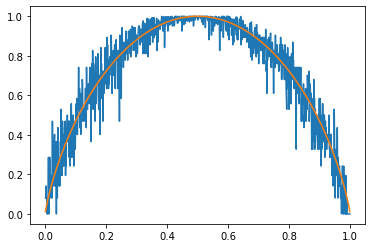

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def affichage(n):
    Lx = np.linspace(0.001,0.999,n)
    LyR=[]
    LyT=[]
    for a in Lx:
        Alphabet3 = {'0': a, '1': 1-a}
        LyT.append(-(a*m.log(a,2) + (1-a)*m.log(1-a,2)))
        LyR.append(entropieReelle(genVecteur(100, Alphabet3), Alphabet3))
    plt.plot(Lx, LyR)
    plt.plot(Lx, LyT)
    plt.show()
    
affichage(1000)

Question 4

            (p00               p10)
            (p01               p11)

(p0     p1) (p0*p00+p1*p01     p0*p10+p1*p11)

On a donc p0 = p0*p00+p1*p01 en régime stationnaire

or p1 = 1-p0

On obtient donc p0*p00 + (1-p0)*p01 = p0

p0*(p00-1-p01)=-p01

p0=p01/(1+p01-p00)
p1=(1-p00)/(1+p01-p00)

H(xk)   = Σ (xk|x(k-1)).p(x(k-1))
        = H(xk|x(k-1)=0).p(x(k-1)=0) + H(xk|x(k-1)=1).p(x(k-1)=1)
        = H(xk|x(k-1)=0).p0 + H(xk|x(k-1)=1).p1
        = -[ p(xk=0|x(k-1)=0).log2(p(xk=0|x(k-1)=0)) + p(xk=1|x(k-1)=0).log2(p(xk=1|x(k-1)=0)) ].p0
          -[ p(xk=0|x(k-1)=1).log2(p(xk=0|x(k-1)=1)) + p(xk=1|x(k-1)=1).log2(p(xk=1|x(k-1)=1)) ].p1
        = -[ p00.log2(p00) + p01.log2(p01) ].p0 - [ p10.log2(p10) + p11.log2(p11) ].p1
          

In [32]:
from PIL import Image as Img
import numpy as np

def matriceTransition(picture):
    im = Img.open(picture)
    imgData = np.asarray(im)
    nN = 0
    bN = 0
    for i in range(len(imgData)):
        for j in range(len(imgData[0])):
            if imgData[i][j] == 0 and imgData[(i+1)%len(imgData)][j] == 0: # si on a un pixel noir et que le pixel "proche" associé est noir
                nN += 1 # on augmente le compteur de pixel noir associé à un pixel noir
            if imgData[i][j] == 1 and imgData[(i+1)%len(imgData)][j] == 0: # si on a un pixel blanc et que le pixel "proche" associé est noir
                bN += 1 # on augmente le compteur de pixel blanc associé à un pixel noir
    nbPixel = len(imgData)*len(imgData[0]) # on calcule le nombre de pixels total
    P = [[nN/nbPixel, 1-(nN/nbPixel)], [bN/nbPixel, 1-(bN/nbPixel)]]
    return P

In [33]:
[[p00, p10], [p01, p11]] = matriceTransition(r"./image.png")

import math as m

p0=p01/(1+p01-p00)
p1=(1-p00)/(1+p01-p00)

# Entropie H(xk)
H1 = -(p00*m.log(p00,2)+p01*m.log(p01,2))*p0 - (p10*m.log(p10,2)+p11*m.log(p11,2))*p1

# Entropie de la source sans mémoire ?
H2 = -p0*m.log(p0,2) - p1*m.log(p1,2)

# Taille moyenne ????


print (H1, H2)

KeyboardInterrupt: 

In [ ]:
from PIL import Image as Img
import numpy as np

def matriceTransition2(picture):
    im = Img.open(picture)
    imgData = np.asarray(im)
    res = []
    for i in range(len(imgData)):
        colorActual = "B"
        string_row = ""
        nombrePixel = 0
        for j in range(len(imgData[0])):
            if imgData[i][j] == 0 :#si pixel noir
                if colorActual == "N" :#si série de pixels noirs
                    nombrePixel += 1
                else :#si série de pixels blancs
                    string = colorActual + str(nombrePixel)
                    string_row += string
                    nombrePixel = 1
                    colorActual = "N"
            else :#si pixel blanc
                if colorActual == "B" :#si série de pixels blancs
                    nombrePixel += 1
                else :#si série de pixels noirs
                    string = colorActual + str(nombrePixel)
                    string_row += string
                    nombrePixel = 1
                    colorActual = "B"
        string = colorActual + str(nombrePixel)
        string_row += string
        res.append(string_row)
        nombrePixel = 0
        colorActual = "B"
    return res


#print(matriceTransition2(r"./image.png"))

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
  
def kMeansAlgo(k):
    image = cv2.imread('ex9Data/bird_small.tiff') 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
    pixel_vals = image.reshape((-1,3)) 
    pixel_vals = np.float32(pixel_vals)
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
    centers = np.uint8(centers) 
    segmented_data = centers[labels.flatten()] 
    segmented_image = segmented_data.reshape((image.shape)) 
    return (image, segmented_image)

def dessinerImg(img):
    plt.imshow(img)

def D(k):
    (img, imgseg) = kMeansAlgo(k)
    squared_diff = (img - imgseg) ** 2
    summed = np.sum(squared_diff)
    num_pix = img.shape[0] * img.shape[1] #img1 and 2 should have same shape
    err = summed / num_pix
    return err

D(8)

235.36883544921875

In [ ]:
def courbeDR():
    Lx = []
    Ly = []
    for k in range (2, 21):
        Lx.append(R(k))
        Ly.append(D(k))
    plt.plot(Lx, Ly)
    plt.show()

In [61]:
def codingRateRLETest(k):
    (img, imgData) = kMeansAlgo(k)
    res = []
    for i in range(len(imgData)):
        colorActual = imgData[i][0]
        string_row = ""
        nombrePixel = 0
        for j in range(len(imgData[0])):
            if (imgData[i][j] == colorActual).all() :
                nombrePixel += 1
            else :
                if nombrePixel != 0 :
                    string = str(colorActual) + "-" + str(nombrePixel) + "/"
                    string_row += string
                nombrePixel = 1
                colorActual = imgData[i][j]
        string = str(colorActual) + "-" + str(nombrePixel) + "/"
        string_row += string
        res.append(string_row)
        nombrePixel = 0
    codebook = []
    codebook_value = 0
    return res, codebook


In [124]:
def colorToKey(liste):
    string = ""
    for i in range (3):
        string+= str(liste[i])
        if i != 2:
            string+= ","
    return string

def keyToColor(string):
    liste = string.split(",")
    listeARendre = []
    for i in range(3):
        listeARendre.append(int(liste[i]))
    return np.array(listeARendre)

def miseEnDico(dico, color, index):
    cle = colorToKey(list(color))
    if cle not in dico: # on regarde si on connaît ce code couleur dans le codebook
        dico[cle]=index # on ajoute la clé au dictionnaire
        code = index # on conserve le code de cette couleur
        index+=1
    else: # si la clé est connue
        code = dico.get(cle) # on récupère le code de cette couleur
    return (code,dico, index)

def changementDico(dico):
    dictionnaireCouleurs = {}
    for cle,valeur in dico.items():
        dictionnaireCouleurs[valeur]=keyToColor(cle)
    return dictionnaireCouleurs
    

In [139]:
def codingRateRLE(k):
    (img, imgData) = kMeansAlgo(k)
    res, codebook, index = [], {}, 0
    for i in range(len(imgData)): # on parcourt toutes les lignes de l'image
        colorActual = imgData[i][0] # on initialise la première couleur
        string_row = "" # chaîne représentant la ligne en cours d'étude
        nombrePixel = 0 # nombre de pixels de cette couleur
        for j in range(len(imgData[0])): # on parcourt une ligne de l'image
            if (imgData[i][j] == colorActual).all() : # si la couleur du pixel étudié est identique à la précédente
                nombrePixel += 1 # on augmente
            else : # sinon (si la couleur est différente)
                if nombrePixel != 0 : # si le nombre de pixel est non nul
                    (codeIn, codebook, index) = miseEnDico(codebook, colorActual, index)
                    string = str(codeIn) + " " + str(nombrePixel) + ";"
                    string_row += string
                nombrePixel = 1
                colorActual = imgData[i][j]
                codeIn = codebook.get(colorToKey(list(colorActual)))
        colorActual = imgData[i][j]
        (codeIn, codebook, index) = miseEnDico(codebook, colorActual, index)
        string = str(codeIn) + " " + str(nombrePixel)
        string_row += string
        res.append(string_row)
        nombrePixel = 0
    return res, codebook

['0 93;1 1;0 2;2 2;3 30', '0 93;1 2;0 2;2 1;3 30', '0 94;1 1;0 3;3 30', '0 75;4 1;0 2;4 1;0 1;4 1;0 14;1 2;0 1;2 1;3 2;2 1;3 26', '0 50;2 2;0 6;2 5;0 6;2 1;0 3;4 4;0 1;4 1;0 1;4 3;0 12;1 2;0 2;3 2;2 2;3 25', '0 50;2 1;0 2;2 14;0 3;2 1;4 13;0 11;1 3;0 1;2 1;3 1;2 2;3 25', '0 53;2 19;4 13;0 11;1 3;2 2;4 1;2 1;3 25', '0 52;2 20;4 6;2 1;4 7;0 10;1 3;0 3;2 1;3 25', '0 52;2 19;4 3;2 7;4 6;0 9;1 4;0 2;2 2;3 24', '0 28;4 3;0 20;2 19;4 2;2 2;3 1;2 7;4 2;2 1;4 2;0 9;1 4;0 2;2 2;3 24'] {'209,165,97': 0, '238,222,187': 1, '120,95,69': 2, '31,32,30': 3, '151,144,148': 4}


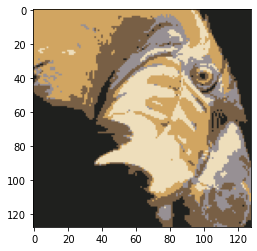

In [143]:
(result, cb) = codingRateRLE(5)
print(result[0:10],cb)
(im1, im2)=kMeansAlgo(5)
img = reconstructionImage(result, cb)
dessinerImg(img)

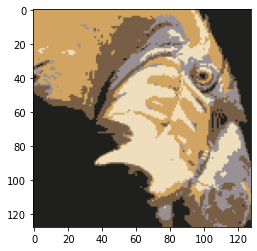

In [144]:
dessinerImg(im2)

In [140]:
def reconstructionImage(RLE, codebook):
    decodebook = changementDico(codebook)
    image = []
    for i in range (len(RLE)):
        ligne = []
        liste = RLE[i].split(";")
        for j in range(len(liste)):
            liste2 = liste[j].split(" ")
            for k in range (int(liste2[1])):
                ligne.append(decodebook.get(int(liste2[0])))
        image.append(np.array(ligne))
    return np.array(image)